# Exploration of selected policies

In [2]:
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from ema_workbench.analysis.plotting import lines, Density

C:\Users\irene\anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\irene\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


In [5]:
results = pd.read_excel('./Data/filtered_policies.xlsx')
results = results.drop(['Unnamed: 0'], axis=1)
# drop index
results

,Proposed harvesting quota 0,Proposed harvesting quota 1,Proposed harvesting quota 2,Proposed harvesting quota 3,Proposed harvesting quota 4,Proposed harvesting quota 5,Proposed harvesting quota 6,Proposed harvesting quota 7,Proposed harvesting quota 8,Proposed harvesting quota 9,...,Proposed harvesting quota 35,Proposed harvesting quota 36,Proposed harvesting quota 37,Proposed harvesting quota 38,Proposed harvesting quota 39,Proposed harvesting quota 40,Proposed harvesting quota 41,Proposed harvesting quota 42,Proposed harvesting quota 43,Proposed harvesting quota 44
0,5.491059,5.444262,5.510904,5.938919,5.983407,5.992127,5.997443,5.929798,5.969624,5.901823,...,4.514762,4.528083,4.523651,4.471708,4.480812,4.524310,4.519397,4.545243,4.598656,4.655942
1,5.491239,5.443735,5.510887,5.922931,5.983381,5.992445,5.939761,5.952485,5.969405,5.994358,...,4.514762,4.463967,4.520716,4.471370,4.483149,4.526866,4.518087,4.539937,4.431970,5.265770


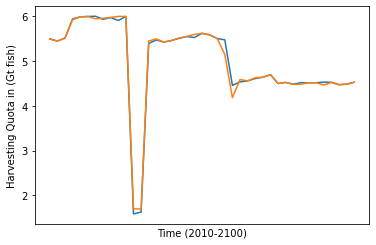

In [4]:
results=results.T
results = results.iloc[:-4]
fig=results.plot(legend=False)
fig.set_xlabel("Time (2010-2100)")
fig.set_ylabel("Harvesting Quota in (Gt fish)")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.savefig('./Figures/policy_selected.png')



# Box plots

In [45]:
#also boxplot the outcomes without any harvesting, 
# so a comparison can be made in the trade off between food provision and carbon sequestration
file_name = './Data/results_tradeoff_st5.tar.gz'
experiments_0, outcomes_0 = load_results(file_name)

In [46]:
del outcomes_0['TIME']

In [47]:
outcomes_0 = pd.DataFrame.from_dict(outcomes_0)

In [48]:
#import the results from step 4
file_name = './Data/results_step4_7.tar.gz'
experiments, outcomes = load_results(file_name)

In [49]:
del outcomes['TIME']

In [50]:
outcomes = pd.DataFrame.from_dict(outcomes)
outcomes['policy'] = 1
outcomes['policy'].iloc[10000:] = 2


C:\Users\irene\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [51]:
outcomes_1=outcomes.iloc[:9999] 
outcomes_2=outcomes.iloc[10000:] 


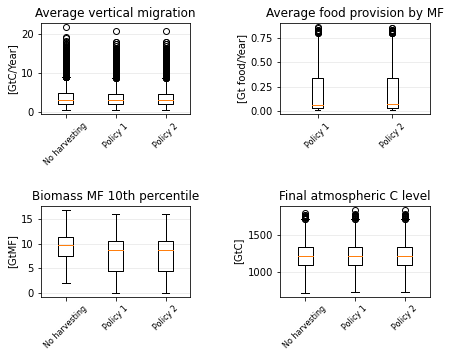

In [85]:
fig, ax = plt.subplots(2,2)

ax[0,0].boxplot([outcomes_0['Average vertical migration'], outcomes_1['Average vertical migration'], outcomes_2['Average vertical migration']])
ax[0,0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax[0,0].set_xticklabels(['No harvesting', 'Policy 1', 'Policy 2'],
                    rotation=45, fontsize=8)
ax[0, 0].set_title('Average vertical migration')
ax[0, 0].set(ylabel='[GtC/Year]')



ax[0,1].boxplot( [outcomes_1['Average food provision by MF'], outcomes_2['Average food provision by MF']])
ax[0,1].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax[0,1].set_xticklabels([ 'Policy 1', 'Policy 2'],
                    rotation=45, fontsize=8)
ax[0, 1].set_title('Average food provision by MF')
ax[0, 1].set(ylabel='[Gt food/Year]')



ax[1,0].boxplot([outcomes_0['Biomass MF 10th percentile'], outcomes_1['Biomass MF 10th percentile'], outcomes_2['Biomass MF 10th percentile']])
ax[1,0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax[1,0].set_xticklabels(['No harvesting', 'Policy 1', 'Policy 2'],
                    rotation=45, fontsize=8)
ax[1, 0].set_title('Biomass MF 10th percentile')
ax[1, 0].set(ylabel='[GtMF]')



ax[1,1].boxplot([outcomes_0['Final atmospheric C level'], outcomes_1['Final atmospheric C level'], outcomes_2['Final atmospheric C level']])
ax[1,1].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax[1,1].set_xticklabels(['No harvesting', 'Policy 1', 'Policy 2'],
                    rotation=45, fontsize=8)
ax[1, 1].set_title('Final atmospheric C level')
ax[1, 1].set(ylabel='[GtC]')

fig.subplots_adjust(left=0.1, right=1, bottom=0.05, top=1,
                    hspace=1, wspace=0.6)

plt.savefig('./Figures/boxplot_zero_vm.png', bbox_inches="tight")

plt.show()



In [106]:
data_no = outcomes_0.describe().T
data_p1 = outcomes_1.describe().T
data_p2 = outcomes_2.describe().T

data_p1.drop(['policy'], inplace=True)
data_p2.drop(['policy'], inplace=True)
data_no.drop(['count', '25%', '50%', '75%'],  axis=1, inplace=True)
data_p1.drop(['count', '25%', '50%', '75%'],  axis=1, inplace=True)
data_p2.drop(['count', '25%', '50%', '75%'],  axis=1, inplace=True)

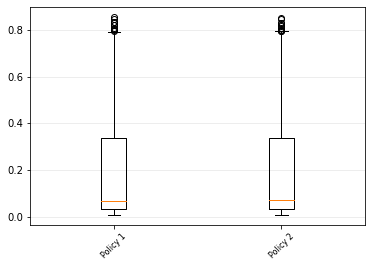

In [70]:
fig, ax = plt.subplots()
ax.boxplot( [outcomes_1['Average food provision by MF'], outcomes_2['Average food provision by MF']])
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax.set_xticklabels([ 'Policy 1', 'Policy 2'],
                    rotation=45, fontsize=8)


plt.savefig('./Figures/boxplot_zero_food.png')
plt.show()



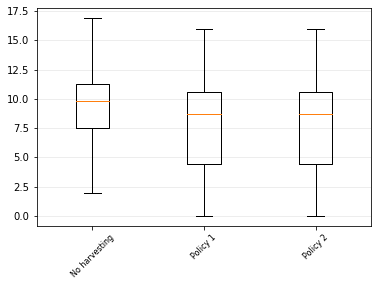

In [71]:
fig, ax = plt.subplots()
ax.boxplot([outcomes_0['Biomass MF 10th percentile'], outcomes_1['Biomass MF 10th percentile'], outcomes_2['Biomass MF 10th percentile']])
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.set_xticklabels(['No harvesting', 'Policy 1', 'Policy 2'],
                    rotation=45, fontsize=8)


plt.savefig('./Figures/boxplot_zero_bio.png')
plt.show()



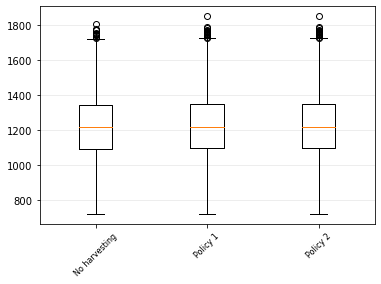

In [72]:
fig, ax = plt.subplots()
ax.boxplot([outcomes_0['Final atmospheric C level'], outcomes_1['Final atmospheric C level'], outcomes_2['Final atmospheric C level']])
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.set_xticklabels(['No harvesting', 'Policy 1', 'Policy 2'],
                    rotation=45, fontsize=8)


plt.savefig('./Figures/boxplot_zero_atm.png')
plt.show()



In [16]:
outcomes = pd.DataFrame.from_dict(outcomes)
outcomes['policy'] = 1
outcomes['policy'].iloc[10000:] = 2


C:\Users\irene\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Average food provision by MF,Average vertical migration,Biomass MF 10th percentile,Final atmospheric C level,Inertia,policy
0,0.021469,3.209514,7.690712,1299.6146,0.113636,1
1,0.030440,4.747004,10.184169,1363.7865,0.113636,1
2,0.022348,1.782187,9.549087,1224.9190,0.113636,1
3,0.435929,1.839704,4.634749,1505.4111,0.113636,1
4,0.361654,6.377014,10.874047,1212.8247,0.113636,1
...,...,...,...,...,...,...
19995,0.018976,1.474649,7.830840,1215.7910,0.204545,2
19996,0.335497,3.028207,8.865918,1195.4490,0.204545,2
19997,0.349684,3.792538,13.001319,1361.0748,0.204545,2
19998,0.032411,3.688400,10.084822,1045.9141,0.204545,2


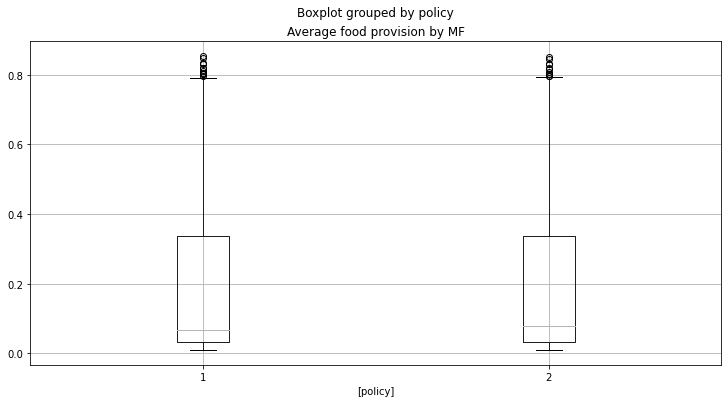

In [22]:
boxplot = outcomes.boxplot(column=['Average food provision by MF'], by=['policy'], figsize=(12,6))
plt.savefig('./Figures/boxplot_selected_food.png')

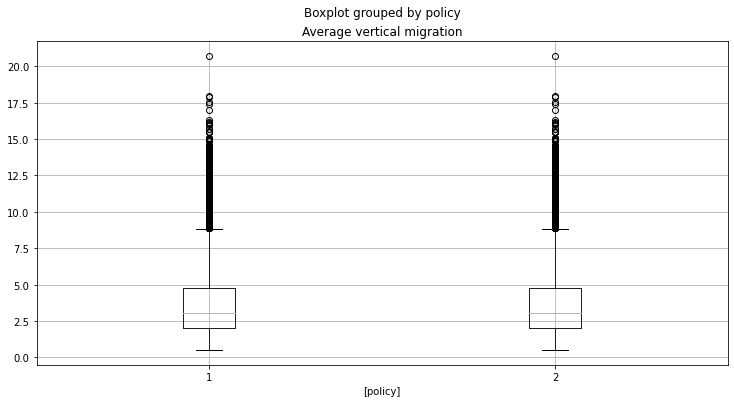

In [23]:
boxplot = outcomes.boxplot(column=['Average vertical migration'], by=['policy'], figsize=(12,6))
plt.savefig('./Figures/boxplot_selected_vm.png')

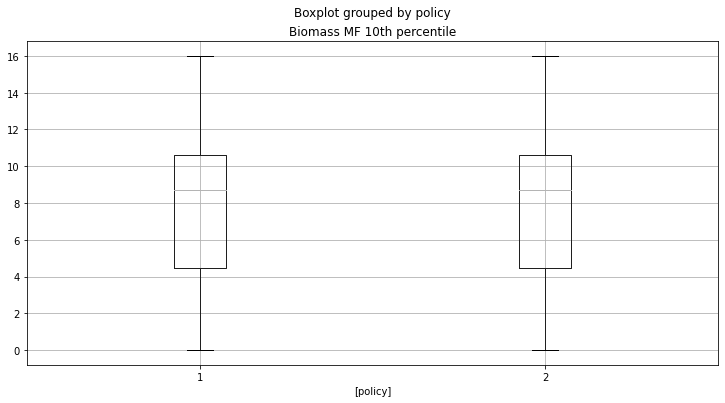

In [24]:
boxplot = outcomes.boxplot(column=['Biomass MF 10th percentile'], by=['policy'], figsize=(12,6))
plt.savefig('./Figures/boxplot_selected_bio.png')

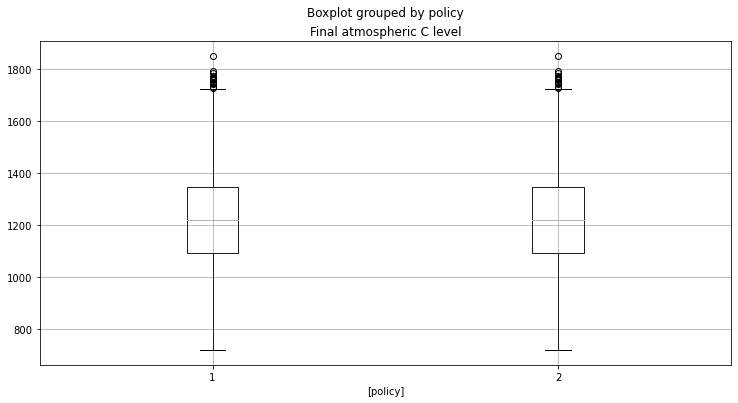

In [25]:
boxplot = outcomes.boxplot(column=['Final atmospheric C level'], by=['policy'], figsize=(12,6))
plt.savefig('./Figures/boxplot_selected_atm.png')

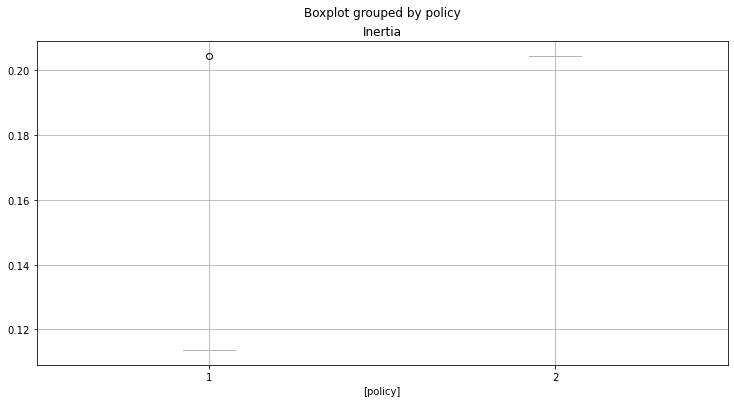

In [26]:
boxplot = outcomes.boxplot(column=['Inertia'], by=['policy'], figsize=(12,6))
plt.savefig('./Figures/boxplot_selected_inertia.png')

# robustness scores of selected policies

In [48]:
scores_sn=pd.read_excel('./Data/scores_step3_sn.xlsx')
scores_sn= scores_sn.loc[[4,5], :]
scores_sn

,Unnamed: 0,Average food provision by MF,Average vertical migration,Biomass MF 10th percentile,Final atmospheric C level,Inertia
4,4,0.028784,9.992888,31.675802,6.92990,1.895454e+13
5,5,0.028774,9.992885,31.671150,6.92989,7.225026e+13


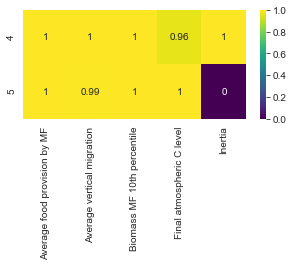

In [58]:
max_regret= pd.read_excel('./Data/scores_step3_mr.xlsx')

max_regret= max_regret.loc[[4,5], :]
max_regret = max_regret.drop(['policy'], axis=1)
fig, ax = plt.subplots(figsize=(5, 2))
sns.heatmap(max_regret / max_regret.max(), cmap='viridis', annot=True)
plt.savefig('./Figures/heatmap_maxregret_selected.png')
plt.show()


# Line plots for exploration of multiple parameters

In [22]:
file_name = './Data/results_step5.tar.gz'

experiments, outcomes = load_results(file_name)

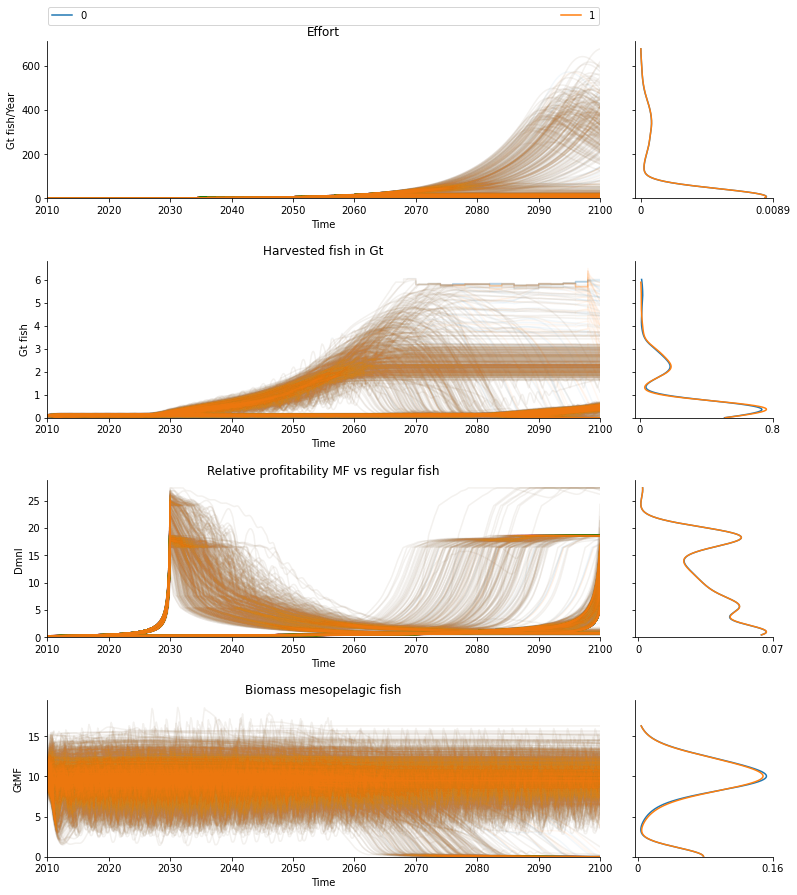

In [4]:

lines(experiments, outcomes,outcomes_to_show = ['Effort', 'Harvested fish in Gt', 'Relative profitability MF vs regular fish', 'Biomass mesopelagic fish'] , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(13,15)
ax = fig.get_axes()

ax[0].set_ylabel('Gt fish/Year')
ax[2].set_ylabel('Gt fish')
ax[4].set_ylabel('Dmnl')
ax[6].set_ylabel('GtMF')

for line in ax[0].get_lines():
    line.set_alpha(0.05)
for line in ax[2].get_lines():
    line.set_alpha(0.05)
for line in ax[4].get_lines():
    line.set_alpha(0.05)
for line in ax[6].get_lines():
    line.set_alpha(0.05)

        
for i in [0,2,4,6]:
    ax[i].set(ylim=(0, None), xlim=(2010,2100))
    
sns.despine()
plt.savefig('Figures/lines_step5_effort.png')
plt.show()

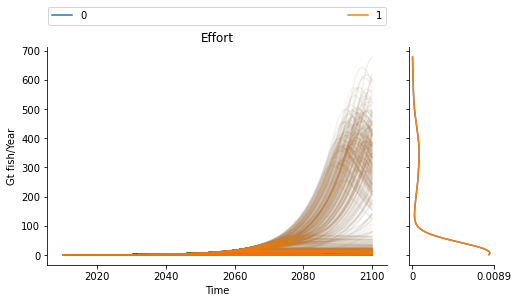

In [12]:

lines(experiments, outcomes,outcomes_to_show = 'Effort' , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()
ax[0].set_ylabel('Gt fish/Year')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
sns.despine()
plt.savefig('Figures/lines_step5_effort.png')
plt.show()

In [ ]:

lines(experiments, outcomes,outcomes_to_show = 'Harvested fish in Gt' , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()
ax[0].set_ylabel('Gt fish')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
sns.despine()
plt.savefig('Figures/lines_step5_harv.png')
plt.show()

In [ ]:

lines(experiments, outcomes,outcomes_to_show = 'Relative profitability MF vs regular fish' , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()
ax[0].set_ylabel('Dmnl')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
sns.despine()
plt.savefig('Figures/lines_step5_prof.png')
plt.show()

In [ ]:

lines(experiments, outcomes,outcomes_to_show = 'Biomass mesopelagic fish' , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()
ax[0].set_ylabel('GtMF')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
sns.despine()
plt.savefig('Figures/lines_step5_bio.png')
plt.show()

In [ ]:

lines(experiments, outcomes,outcomes_to_show = 'Mesopelagic fish juvinile' , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()
ax[0].set_ylabel('GtMF')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
sns.despine()
plt.savefig('Figures/lines_step5_juv.png')
plt.show()

In [ ]:

lines(experiments, outcomes,outcomes_to_show = 'Mesopelagic fish adult' , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()
ax[0].set_ylabel('GtMF')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
sns.despine()
plt.savefig('Figures/lines_step5_adult.png')
plt.show()

In [ ]:

lines(experiments, outcomes,outcomes_to_show = 'Atmospheric C' , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()
ax[0].set_ylabel('GtC')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
sns.despine()
plt.savefig('Figures/lines_step5_atm.png')
plt.show() 

In [ ]:

lines(experiments, outcomes,outcomes_to_show = 'Food provision by MF' , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()
ax[0].set_ylabel('GtC')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
sns.despine()
plt.savefig('Figures/lines_step5_food.png')
plt.show() 

In [ ]:

lines(experiments, outcomes,outcomes_to_show = 'Total vertical migration' , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()
ax[0].set_ylabel('GtC')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
sns.despine()
plt.savefig('Figures/lines_step5_vm.png')
plt.show() 

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

for ax in axs.flat:
    ax.label_outer()

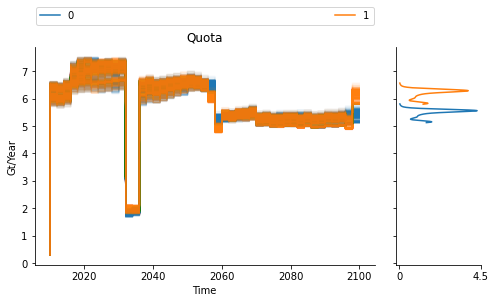

In [4]:

lines(experiments, outcomes,outcomes_to_show = 'Quota' , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()
ax[0].set_ylabel('Gt/Year')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
sns.despine()
plt.savefig('Figures/lines_step5_quota.png')
plt.show() 

In [ ]:
results=results.T
results = results.iloc[:-4]
fig=results.plot(legend=False)
fig.set_xlabel("Time (2010-2100)")
fig.set_ylabel("Harvesting Quota in (Gt fish)")
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,        
    labelbottom=False)
plt.savefig('./Figures/policy_selected.png')

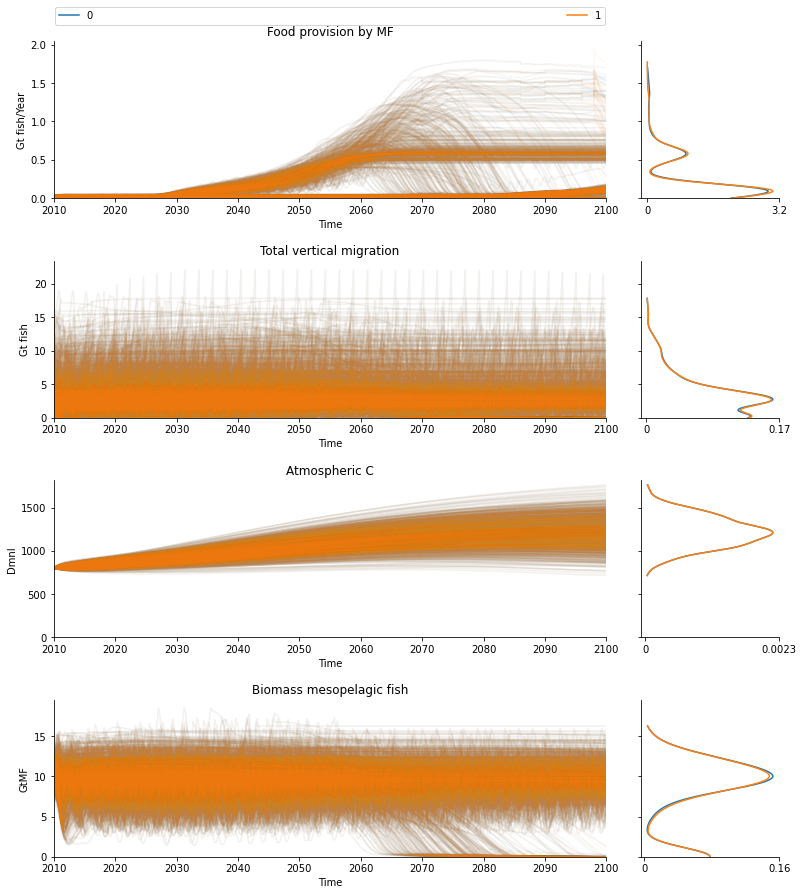

In [6]:

lines(experiments, outcomes,outcomes_to_show = ['Food provision by MF', 'Total vertical migration', 'Atmospheric C', 'Biomass mesopelagic fish'] , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(13,15)
ax = fig.get_axes()

ax[0].set_ylabel('Gt fish/Year')
ax[2].set_ylabel('Gt fish')
ax[4].set_ylabel('Dmnl')
ax[6].set_ylabel('GtMF')

for line in ax[0].get_lines():
    line.set_alpha(0.05)
for line in ax[2].get_lines():
    line.set_alpha(0.05)
for line in ax[4].get_lines():
    line.set_alpha(0.05)
for line in ax[6].get_lines():
    line.set_alpha(0.05)

        
for i in [0,2,4,6]:
    ax[i].set(ylim=(0, None), xlim=(2010,2100))
    
sns.despine()
plt.savefig('Figures/lines_step5_outcomes.png')
plt.show()

In [23]:
file_name = './Data/results_step5_nolobby.tar.gz'

experiments_nolob, outcomes_nolob = load_results(file_name)

In [36]:
# outcomes = pd.DataFrame.from_dict(outcomes, orient='columns') 
# outcomes_nolob = pd.DataFrame.from_dict(outcomes_nolob) 
# outcomes = pd.concat([outcomes,outcomes_nolob])
# outcomes['lobby'] = 0
# outcomes['lobby'].iloc[2000:] = 1

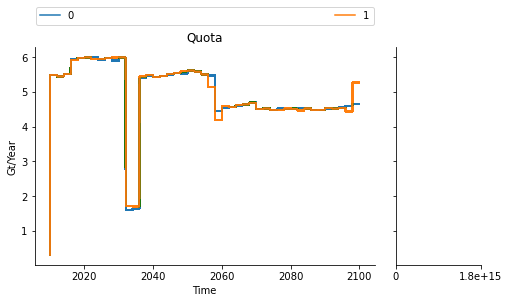

In [8]:

lines(experiments_nolob, outcomes_nolob,outcomes_to_show = 'Quota' , group_by = 'policy' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()
ax[0].set_ylabel('Gt/Year')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
sns.despine()
plt.savefig('Figures/lines_step5_quota_nolob.png')
plt.show() 

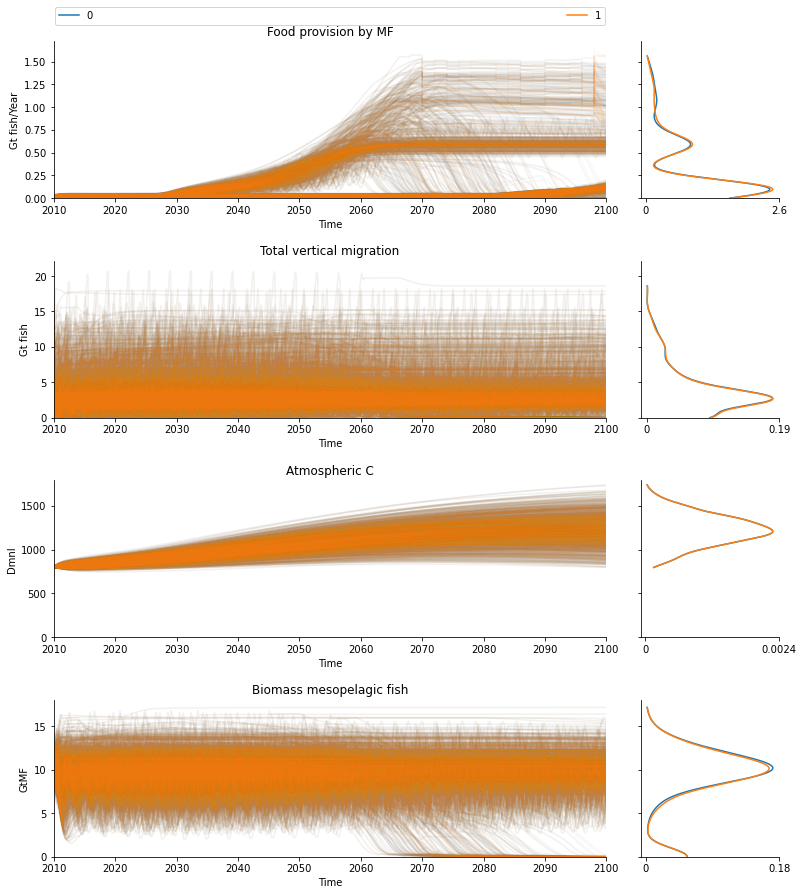

In [9]:

lines(experiments, outcomes,outcomes_to_show =  ['Food provision by MF', 'Total vertical migration', 'Atmospheric C', 'Biomass mesopelagic fish'] , group_by = 'lobby' ,density = Density.KDE)
fig = plt.gcf()
fig.set_size_inches(13,15)
ax = fig.get_axes()

ax[0].set_ylabel('Gt fish/Year')
ax[2].set_ylabel('Gt fish')
ax[4].set_ylabel('Dmnl')
ax[6].set_ylabel('GtMF')

for line in ax[0].get_lines():
    line.set_alpha(0.05)
for line in ax[2].get_lines():
    line.set_alpha(0.05)
for line in ax[4].get_lines():
    line.set_alpha(0.05)
for line in ax[6].get_lines():
    line.set_alpha(0.05)

        
for i in [0,2,4,6]:
    ax[i].set(ylim=(0, None), xlim=(2010,2100))
    
sns.despine()
plt.savefig('Figures/lines_step5_outcomes_nolob.png')
plt.show()